# Local Outlier Factor (LOF)

## Import Libraries

In [1]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import sys

## Import Functions

In [2]:
# path to functions
sys.path.insert(0, '../../src')

# import functions
import model_functions as mf

## Load Data

In [3]:
X, x_test = mf.load_data()

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Columns: 375 entries, TransactionID to D15_to_std_addr2
dtypes: float64(375)
memory usage: 64.5 MB


# Base Model

Run Time:

In [4]:
# parameter grid
param_grid = {
    'n_neighbors': range(5, 50, 5),
    'contamination': np.arange(0.1, 0.5, 0.1)
}

# Perform hyperparameter tuning
best_params_bm = mf.hyper_tuning(LocalOutlierFactor, param_grid, X)

# best parameters
print(best_params_bm)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_s

{'contamination': 0.1, 'n_neighbors': 5}


## Train Model

In [5]:
# initialize the model
base_model = LocalOutlierFactor(n_neighbors=best_params_bm['n_neighbors'], contamination=best_params_bm['contamination'])

# train model
base_model.fit(X)

LocalOutlierFactor(contamination=0.1, n_neighbors=5)

## Evaluation

In [6]:
# evaluate the model
sil_score_bm, db_score_bm, ch_score_bm, anomaly_scores_bm, score_bm = mf.evaluate_lof_model(base_model, X)

### Scores

In [7]:
# print metrics evaluation
mf.show_metrics(sil_score_bm, db_score_bm, ch_score_bm, score_bm, 'Base Model')

Silhouette Score of Base Model: 0.09482231780151003
Davies-Bouldin Score of Base Model: 8.035965664093274
Calinski-Harabasz Score of Base Model: 22.554685512061823
Score of Base Model: -0.5084283475433554


### Anomaly Score Distribution

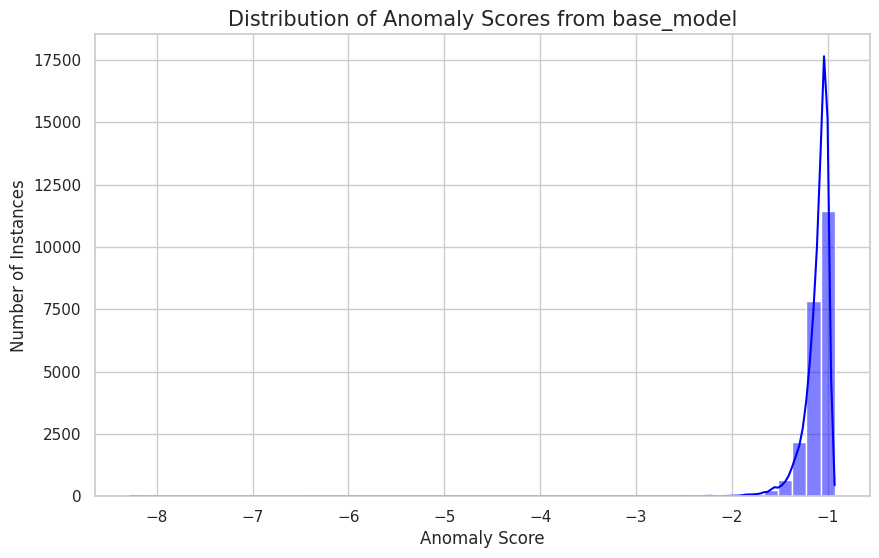

In [8]:
# plot the histogram of the anomaly scores
mf.plot_hist('lof', anomaly_scores_bm, 'base_model')